In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
# Importing the dataset
dataset = pd.read_csv("../input/heart.csv")

Check the missing data.

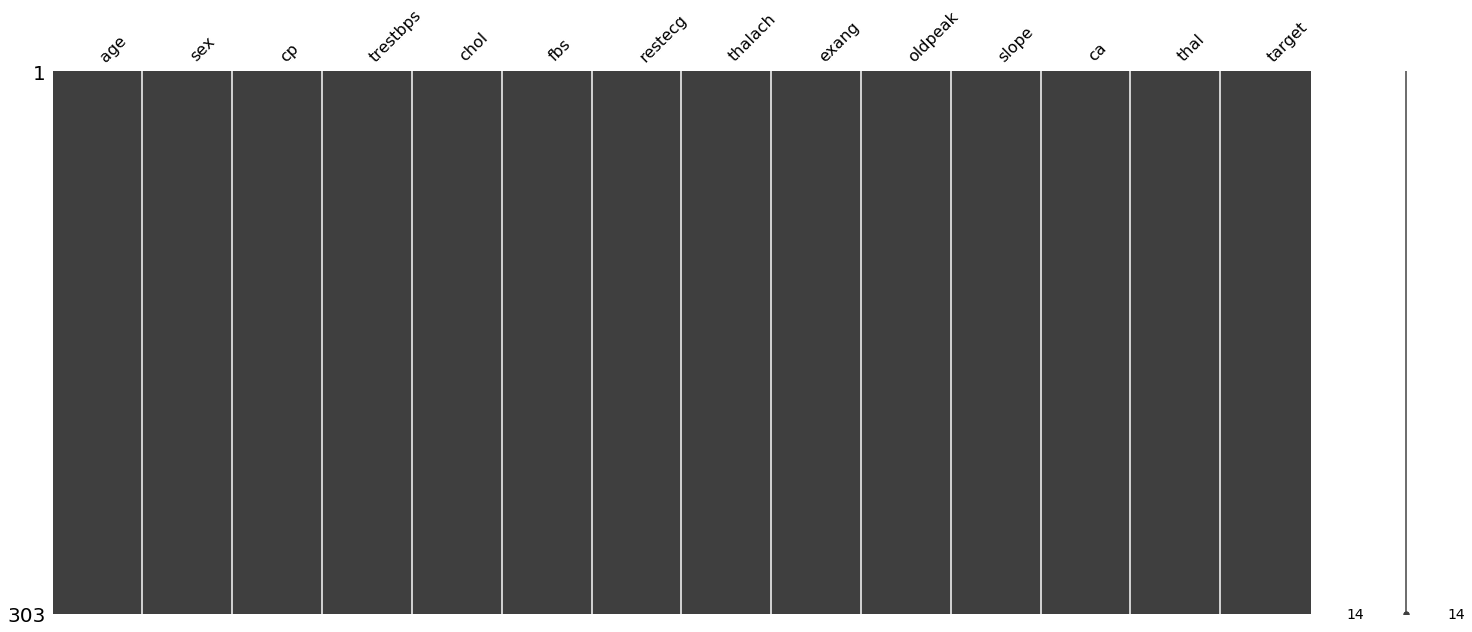

In [3]:
import missingno as msno
msno.matrix(dataset)


No missing data. :)

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 There are 14 columns out of which first 13 are the features of a heart paitent. These 13 features will be analysed for predicting the disease.

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.shape

(303, 14)

Visualizing the data

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


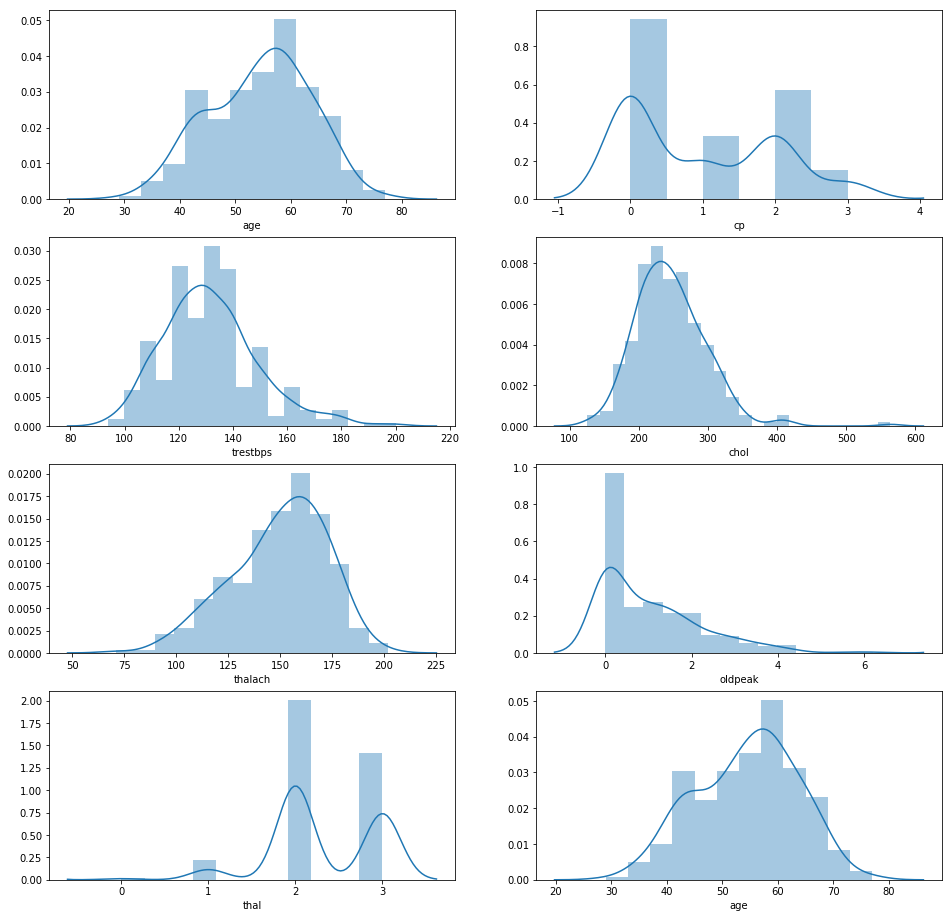

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4,2, figsize = (16,16))
sns.distplot(dataset.age, ax = ax[0, 0])
sns.distplot(dataset.cp, ax = ax[0, 1])
sns.distplot(dataset.trestbps, ax = ax[1, 0])
sns.distplot(dataset.chol, ax = ax[1, 1])
sns.distplot(dataset.thalach, ax = ax[2, 0])
sns.distplot(dataset.oldpeak, ax = ax[2, 1])
sns.distplot(dataset.thal, ax = ax[3, 0])
sns.distplot(dataset.age, ax = ax[3, 1])


Gender graph

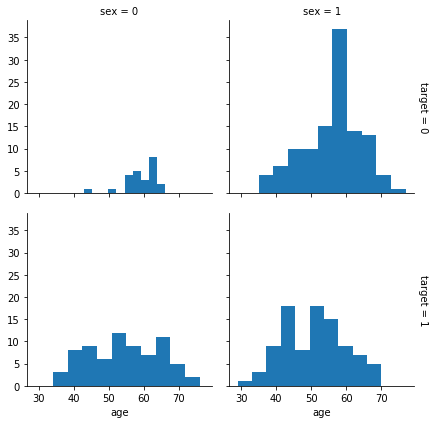

In [8]:
# sns.set(style="darkgrid")
# sns.countplot(dataset.sex, palette="Set3")

g = sns.FacetGrid(dataset, col="sex", row="target", margin_titles=True)
g.map(plt.hist, "age")

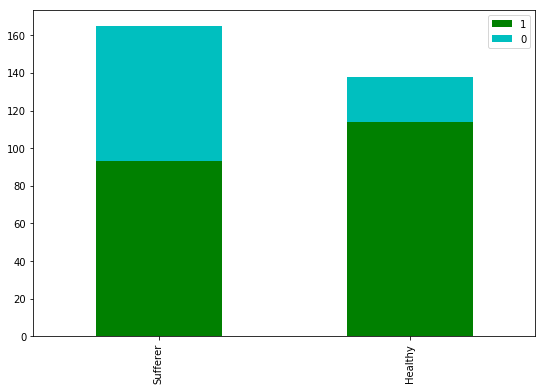

In [9]:
sufferer_sex = dataset[dataset['target']==1]['sex'].value_counts()
healthy_sex = dataset[dataset['target']==0]['sex'].value_counts()
df = pd.DataFrame([sufferer_sex, healthy_sex])
df.index = ['Sufferer','Healthy']
df.plot(kind='bar',stacked=True, figsize=(9,6), color = ['g', 'c'])

Correlation Heat Map

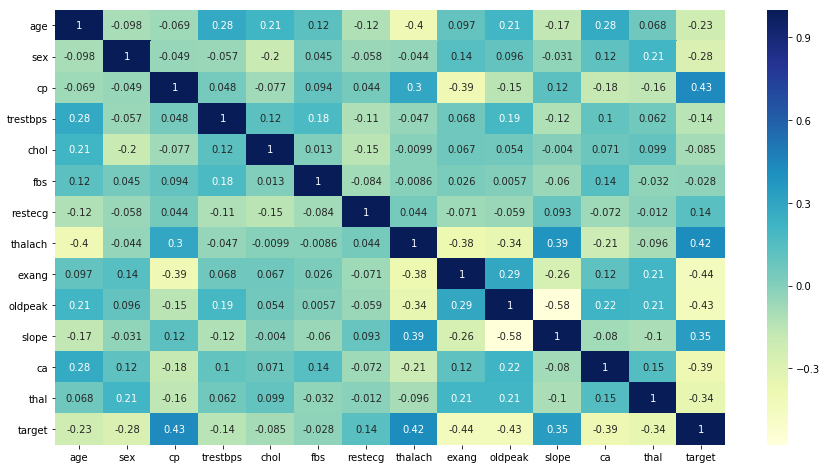

In [10]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(dataset.corr(), annot = True, cmap = 'YlGnBu')

In [11]:
# Splitting the dataset into testing set and training set
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Apply Machine learning models

0.8289473684210527


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


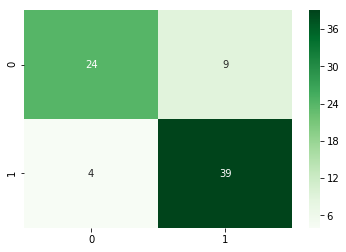

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_1 = LogisticRegression()
classifier_1.fit(X_train, y_train)

# Predicting
y_pred = classifier_1.predict(X_test)

# Accuracy
print(classifier_1.score(X_test, y_test))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Visualizing
sns.heatmap(cm, annot = True, cmap = 'Greens')

In [13]:
# # K-nearest neighbour
# from sklearn.neighbors import KNeighborsClassifier
# classifier_2 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
# classifier_2.fit(X_train, y_train)

# # predicting
# y_pred = classifier_2.predict(X_test)

# # Accuracy
# print(classifier_2.score(X_test, y_test))

# # Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# # Visualizing
# sns.heatmap(cm, annot = True, cmap = 'Greens')

0.8421052631578947


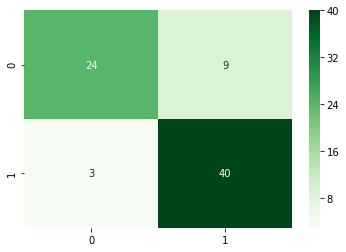

In [14]:
# SVM
from sklearn.svm import SVC
classifier_3 = SVC(kernel = 'linear')
classifier_3.fit(X_train, y_train)

# predicting
y_pred = classifier_3.predict(X_test)

# Accuracy
print(classifier_3.score(X_test, y_test))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Visualizing
sns.heatmap(cm, annot = True, cmap = 'Greens')

0.8289473684210527


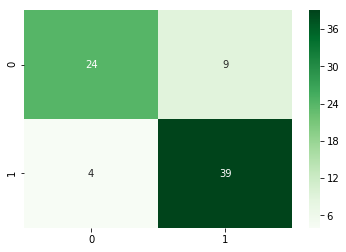

In [15]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_4 = GaussianNB()
classifier_4.fit(X_train, y_train)

# predicting
y_pred = classifier_4.predict(X_test)

# Accuracy
print(classifier_4.score(X_test, y_test))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Visualizing
sns.heatmap(cm, annot = True, cmap = 'Greens')

0.7894736842105263


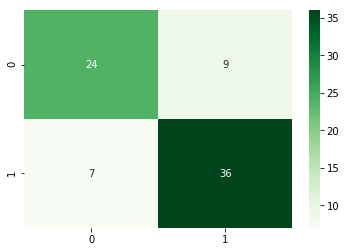

In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_5 = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier_5.fit(X_train, y_train)

# predicting
y_pred = classifier_5.predict(X_test)

# Accuracy
print(classifier_5.score(X_test, y_test))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Visualizing
sns.heatmap(cm, annot = True, cmap = 'Greens')

0.8552631578947368


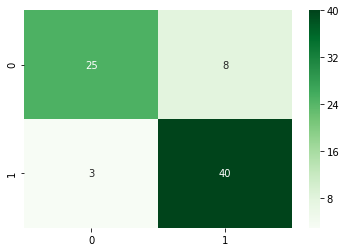

In [17]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_6 = RandomForestClassifier(n_estimators = 200, criterion = "entropy", random_state = 0)
classifier_6.fit(X_train, y_train)

# predicting
y_pred = classifier_6.predict(X_test)

# Accuracy
print(classifier_6.score(X_test, y_test))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Visualizing
sns.heatmap(cm, annot = True, cmap = 'Greens')
